In [18]:
# Importing Dependencies and Setup
# We don't know what we need, so we'll import a bunch of different modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import json
import time
from scipy.stats import linregress

In [19]:
# Load CSV file and turn it into PD DataFrames
goOne_df = pd.read_csv("Resources/goemotions_1.csv")
goTwo_df = pd.read_csv("Resources/goemotions_2.csv")
goThree_df = pd.read_csv("Resources/goemotions_3.csv")

In [20]:
# Merge the three separate DataFrames into one.
dfMerge = goOne_df.merge(goTwo_df, how='outer')
dfMerge = dfMerge.merge(goThree_df, how='outer')

# Convert column into DateTime datatype, and apply the correct unit (seconds) to turn it readable.
dfMerge['created_utc'] = dfMerge['created_utc'].astype('datetime64[s]')
dfMerge

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,2019-01-25 01:50:39,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,2019-01-21 15:22:49,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,2019-01-02 11:15:44,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,2019-01-20 06:17:34,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,2019-01-05 06:10:01,2,False,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211220,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,2019-01-16 10:25:22,16,False,0,...,1,0,0,0,0,0,0,0,0,0
211221,Well when you’ve imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,2019-01-27 01:39:42,15,False,0,...,0,0,0,0,0,0,0,0,0,0
211222,That looks amazing,ee8hse1,springt1me,shittyfoodporn,t3_agrnqb,t3_agrnqb,2019-01-17 00:08:54,70,False,1,...,0,0,0,0,0,0,0,0,0,0
211223,The FDA has plenty to criticize. But like here...,edrhoxh,enamedata,medicine,t3_aejqzd,t1_edrgdtx,2019-01-11 01:07:12,4,False,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Clean DataFrame by: 1.# Dropping columns, 2.) Choosing "Clear" selections, 3.) Dropping the "example_very_unclear" column after selection
dfStaging = dfMerge.drop(columns=['id', 'author', 'link_id', 'parent_id'])
dfStagingA = dfStaging.loc[(dfStaging['example_very_unclear'] == False)]
dfClean = dfStagingA.drop(columns=['example_very_unclear'])
dfClean
# dfClean will have "clear" examples

,text,subreddit,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,nrl,2019-01-25 01:50:39,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,"You do right, if you don't care then fuck 'em!",confessions,2019-01-02 11:15:44,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,facepalm,2019-01-20 06:17:34,18,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",starwarsspeculation,2019-01-05 06:10:01,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Right? Considering it’s such an important docu...,TrueReddit,2019-01-23 21:50:08,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,"Well, I'm glad you're out of all that now. How...",raisedbynarcissists,2019-01-04 15:22:34,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211220,Everyone likes [NAME].,heroesofthestorm,2019-01-16 10:25:22,16,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
211221,Well when you’ve imported about a gazillion of...,nottheonion,2019-01-27 01:39:42,15,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
211222,That looks amazing,shittyfoodporn,2019-01-17 00:08:54,70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Clean DataFrame by: 1.# Dropping columns, 2.) Choosing "Unclear" selections, 3.) Dropping the "example_very_unclear" column after selection
# Same as above; 
dfStagingB = dfStaging.loc[(dfStaging['example_very_unclear'] == True)]
dfEVUClean = dfStagingB.drop(columns=['example_very_unclear'])
dfEVUClean
# dfEVUClean will have "unclear" examples

,text,subreddit,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
1,>sexuality shouldn’t be a grouping category I...,unpopularopinion,2019-01-21 15:22:49,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,Oi us cancers don’t want him either! We respec...,Justfuckmyshitup,2019-01-13 22:13:56,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,I unfortunately can not afford a lawyer. Lucki...,Divorce,2019-01-01 17:28:15,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,OMG THOSE TINY SHOES! *desire to boop snoot in...,chicago,2019-01-20 05:36:33,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,I would pay money for [NAME] to not be my nurs...,SoulCalibur,2019-01-17 03:50:29,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211037,_____ is ruining _____ because kids these days.,moviescirclejerk,2019-01-10 23:51:59,57,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211082,"yea I agree, and [NAME] is way younger so has ...",Dodgers,2019-01-04 22:09:22,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211113,"Huh, assumed he was more of a grindr fella .....",90dayfianceuncensored,2019-01-30 23:05:53,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211214,Well when you’ve imported about a gazillion of...,nottheonion,2019-01-27 01:39:42,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
dfEVUTrue = dfMerge.loc[dfMerge['example_very_unclear'] == True]

In [48]:
dfEmotions = dfClean

In [49]:
# applying Numpy.select to the clean dataframe which will scan selected columns based on conditions and output the sentiments for each emotion selected
emo_conditions = [
    (dfEmotions['amusement'] == 1),
    (dfEmotions['excitement'] == 1),
    (dfEmotions['joy'] == 1),
    (dfEmotions['love'] == 1),
    (dfEmotions['desire'] == 1),
    (dfEmotions['optimism'] == 1),
    (dfEmotions['caring'] == 1),
    (dfEmotions['pride'] == 1),
    (dfEmotions['admiration'] == 1),
    (dfEmotions['gratitude'] == 1),
    (dfEmotions['relief'] == 1),
    (dfEmotions['approval'] == 1),
    (dfEmotions['realization'] == 1),
    (dfEmotions['surprise'] == 1),
    (dfEmotions['curiosity'] == 1),
    (dfEmotions['confusion'] == 1),
    (dfEmotions['fear'] == 1),
    (dfEmotions['nervousness'] == 1),
    (dfEmotions['remorse'] == 1),
    (dfEmotions['embarrassment'] == 1),
    (dfEmotions['disappointment'] == 1),
    (dfEmotions['sadness'] == 1),
    (dfEmotions['grief'] == 1),
    (dfEmotions['disgust'] == 1),
    (dfEmotions['anger'] == 1),
    (dfEmotions['annoyance'] == 1),
    (dfEmotions['disapproval'] == 1),
    (dfEmotions['neutral'] == 1)
]

sentiments = ['Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
              'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
               'Ambiguous', 'Ambiguous','Ambiguous','Ambiguous',
               'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
               'Negative', 'Negative', 'Negative', 'Negative', 'Neutral']

dfEmotions['Sentiment'] = np.select(emo_conditions, sentiments)
dfEmotions.head(5)

,text,subreddit,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,...,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,Sentiment,Emotion
0,That game hurt.,nrl,2019-01-25 01:50:39,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,Negative,Sadness
2,"You do right, if you don't care then fuck 'em!",confessions,2019-01-02 11:15:44,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Neutral,Neutral
3,Man I love reddit.,facepalm,2019-01-20 06:17:34,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Love
4,"[NAME] was nowhere near them, he was by the Fa...",starwarsspeculation,2019-01-05 06:10:01,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Neutral,Neutral
5,Right? Considering it’s such an important docu...,TrueReddit,2019-01-23 21:50:08,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Gratitude


In [50]:
# Adding another column to display the emotion chosen by the rater
emo_map_yin = [
    (dfEmotions['amusement'] == 1),
    (dfEmotions['excitement'] == 1),
    (dfEmotions['joy'] == 1),
    (dfEmotions['love'] == 1),
    (dfEmotions['desire'] == 1),
    (dfEmotions['optimism'] == 1),
    (dfEmotions['caring'] == 1),
    (dfEmotions['pride'] == 1),
    (dfEmotions['admiration'] == 1),
    (dfEmotions['gratitude'] == 1),
    (dfEmotions['relief'] == 1),
    (dfEmotions['approval'] == 1),
    (dfEmotions['realization'] == 1),
    (dfEmotions['surprise'] == 1),
    (dfEmotions['curiosity'] == 1),
    (dfEmotions['confusion'] == 1),
    (dfEmotions['fear'] == 1),
    (dfEmotions['nervousness'] == 1),
    (dfEmotions['remorse'] == 1),
    (dfEmotions['embarrassment'] == 1),
    (dfEmotions['disappointment'] == 1),
    (dfEmotions['sadness'] == 1),
    (dfEmotions['grief'] == 1),
    (dfEmotions['disgust'] == 1),
    (dfEmotions['anger'] == 1),
    (dfEmotions['annoyance'] == 1),
    (dfEmotions['disapproval'] == 1),
    (dfEmotions['neutral'] == 1)
]

emo_map_yang = ['Amusement', 'Excitement', 'Joy', 'Love', 'Desire', 'Optimism', 'Caring',
              'Pride', 'Admiration', 'Gratitude', 'Relief', 'Approval',
               'Realization', 'Surprise','Curiosity','Confusion',
               'Fear', 'Nervousness', 'Remorse', 'Embarrassment', 'Disappointment', 'Sadness', 'Grief',
               'Disgust', 'Anger', 'Annoyance', 'Disapproval', 'Neutral']
dfEmotions['Emotion'] = np.select(emo_map_yin, emo_map_yang)

In [51]:
dfEClean = dfEmotions.copy()
dfEClean.drop(columns = ['amusement', 'excitement', 'joy', 'love', 'desire', 'optimism', 'caring',\
                                                'pride', 'admiration', 'gratitude', 'relief', 'approval',\
                                                'realization', 'surprise','curiosity','confusion',\
                                                'fear', 'nervousness', 'remorse', 'embarrassment', 'disappointment', 'sadness', 'grief',\
                                                'disgust', 'anger', 'annoyance', 'disapproval', 'neutral'], inplace=True)

In [ ]:
# Importing "CountsSubredditCat.csv" into a DataFrame, check pathing for errors!
SubredditCatDF = pd.read_csv("Resources/CountsSubredditCat.csv")

# Clean by dropping columns and renaming
SubredditCatClean = SubredditCatDF.drop(columns = ['Subscribers', 'Responses','Notes', '77', 'Discussion', '"General" discussion'])
SubredditCatClean.rename(columns={"Subreddit": "subreddit"}, inplace=True)
SubredditCatClean

# Merge cleaned catDataFrame into main DataFrame
dfCleanStaging = dfEClean.merge(SubredditCatClean)

# Rearranging columns by placing subreddit next to subgroup
dfCleanStagingA = dfCleanStaging[['text', 'subreddit', 'Grouping', 'created_utc', 'rater_id', 'Sentiment', 'Emotion']]

# Renaming titles for readability
dfCleanStagingA.rename(columns = {"text":"Text", "subreddit": "Subreddit", "Grouping":"Group", "created_utc":"UTC", "rater_id":"Rater ID"}, inplace=True)

# Moving "Group" column adjacent to "Subreddit"
dfCleanCat = dfCleanStagingA.iloc[:, [0,1,2,3,4,6,5]]

In [52]:
# Clean and categorized DataFrame
dfCleanCat.head()

,text,subreddit,created_utc,rater_id,Sentiment,Emotion
0,That game hurt.,nrl,2019-01-25 01:50:39,1,Negative,Sadness
2,"You do right, if you don't care then fuck 'em!",confessions,2019-01-02 11:15:44,37,Neutral,Neutral
3,Man I love reddit.,facepalm,2019-01-20 06:17:34,18,Positive,Love
4,"[NAME] was nowhere near them, he was by the Fa...",starwarsspeculation,2019-01-05 06:10:01,2,Neutral,Neutral
5,Right? Considering it’s such an important docu...,TrueReddit,2019-01-23 21:50:08,61,Positive,Gratitude
...,...,...,...,...,...,...
211219,"Well, I'm glad you're out of all that now. How...",raisedbynarcissists,2019-01-04 15:22:34,2,Positive,Joy
211220,Everyone likes [NAME].,heroesofthestorm,2019-01-16 10:25:22,16,Positive,Love
211221,Well when you’ve imported about a gazillion of...,nottheonion,2019-01-27 01:39:42,15,Positive,Caring
211222,That looks amazing,shittyfoodporn,2019-01-17 00:08:54,70,Positive,Admiration


# Generating a Heatmap of Activity to Time

In [53]:
# Import seaborn to help us with heatmap
# Grab a copy of a cleaned DataFrame as our baseline
import seaborn as sns
alphaDF = dfEClean.copy()
alphaDF

,text,subreddit,created_utc,rater_id,Sentiment,Emotion
0,That game hurt.,nrl,2019-01-25 01:50:39,1,Negative,Sadness
2,"You do right, if you don't care then fuck 'em!",confessions,2019-01-02 11:15:44,37,Neutral,Neutral
3,Man I love reddit.,facepalm,2019-01-20 06:17:34,18,Positive,Love
4,"[NAME] was nowhere near them, he was by the Fa...",starwarsspeculation,2019-01-05 06:10:01,2,Neutral,Neutral
5,Right? Considering it’s such an important docu...,TrueReddit,2019-01-23 21:50:08,61,Positive,Gratitude
...,...,...,...,...,...,...
211219,"Well, I'm glad you're out of all that now. How...",raisedbynarcissists,2019-01-04 15:22:34,2,Positive,Joy
211220,Everyone likes [NAME].,heroesofthestorm,2019-01-16 10:25:22,16,Positive,Love
211221,Well when you’ve imported about a gazillion of...,nottheonion,2019-01-27 01:39:42,15,Positive,Caring
211222,That looks amazing,shittyfoodporn,2019-01-17 00:08:54,70,Positive,Admiration


In [54]:
alphaGroup_DF = alphaDF.groupby(pd.Grouper(key='created_utc', freq='2h')).rater_id.value_counts()   # Group comments rated by 2 hour windows - the amount of ratings given corresponds to amount of comments made
alGroupDF = pd.DataFrame(alphaGroup_DF)                                                             # Turning it into a DF
alGroupDF                                                                                           # Visualize the DF. It gives us a DF with two indexes (Time & Rater ID) then the value count of each ID

rater_id
created_utc         rater_id          
2019-01-01 00:00:00 4               42
                    61              34
                    37              31
                    2               26
                    15              22
...                                ...
2019-01-31 22:00:00 31               1
                    58               1
                    65               1
                    75               1
                    79               1

[24793 rows x 1 columns]

In [55]:
alGroupDF.reset_index(level=1, drop=True, inplace=True)                 # Dropping the ID index
alGroupDF.rename(columns={"rater_id" : "Comments"}, inplace=True)       # Renaming to 'Comments' to avoid confusion
alGroupDF.reset_index(inplace=True)                                     # Use .reset_index to push a new index; avoids complications from groupby(pd.Grouper(key))
alGroupDF

,created_utc,Comments
0,2019-01-01 00:00:00,42
1,2019-01-01 00:00:00,34
2,2019-01-01 00:00:00,31
3,2019-01-01 00:00:00,26
4,2019-01-01 00:00:00,22
...,...,...
24788,2019-01-31 22:00:00,1
24789,2019-01-31 22:00:00,1
24790,2019-01-31 22:00:00,1
24791,2019-01-31 22:00:00,1


In [56]:
betaDF = alGroupDF.groupby(pd.Grouper(key='created_utc', freq='2h')).sum()      # Using pd.Grouper and .sum to merge comments by time window.
betaDF.reset_index(inplace=True)                                                # Use .reset_index to push a new index; avoids complications from .dt.date
betaDF 

,created_utc,Comments
0,2019-01-01 00:00:00,690
1,2019-01-01 02:00:00,567
2,2019-01-01 04:00:00,474
3,2019-01-01 06:00:00,421
4,2019-01-01 08:00:00,322
...,...,...
367,2019-01-31 14:00:00,634
368,2019-01-31 16:00:00,761
369,2019-01-31 18:00:00,741
370,2019-01-31 20:00:00,884


In [57]:
betaDF['Dates'] = betaDF.created_utc.dt.date        # Breaking DT column into column 'Dates'
betaDF['Time'] = betaDF.created_utc.dt.time         # Breaking DT column into column 'Time'
betaDF.drop(columns=['created_utc'], inplace=True)  # Dropping DT index
betaDF

,Comments,Dates,Time
0,690,2019-01-01,00:00:00
1,567,2019-01-01,02:00:00
2,474,2019-01-01,04:00:00
3,421,2019-01-01,06:00:00
4,322,2019-01-01,08:00:00
...,...,...,...
367,634,2019-01-31,14:00:00
368,761,2019-01-31,16:00:00
369,741,2019-01-31,18:00:00
370,884,2019-01-31,20:00:00


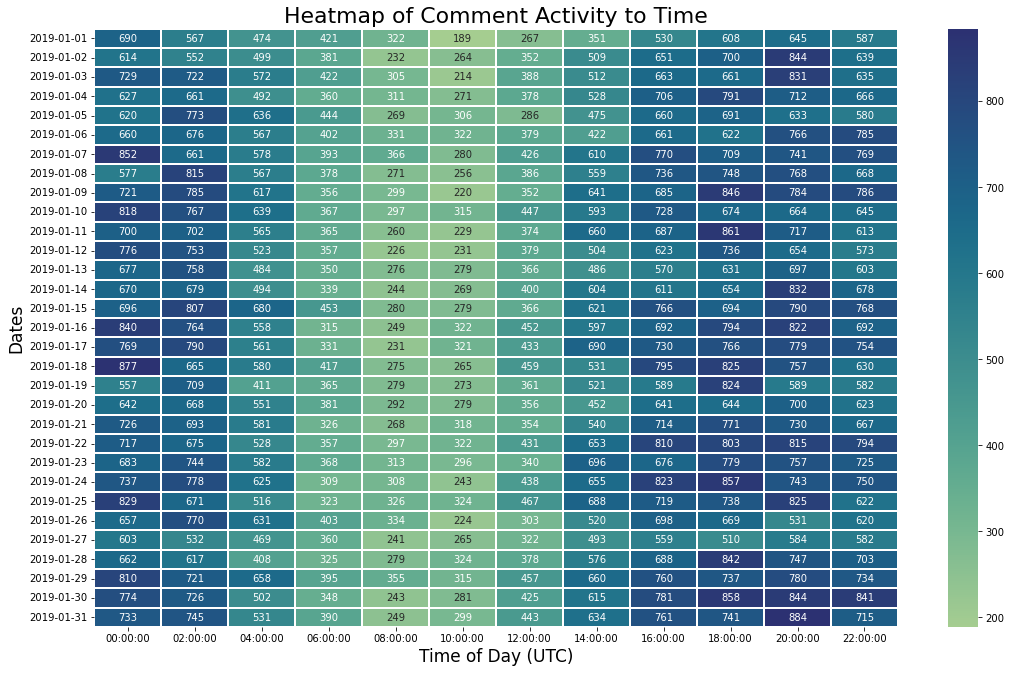

In [58]:
# Preparing a pivot table for Seaborn
betaPivot = betaDF.pivot('Dates', 'Time', 'Comments')

# Plot size, parameters, titles, etc.
plt.figure(figsize=(18, 11))
sns.heatmap(betaPivot, annot=True, fmt="g", cmap='crest', linewidth=1)
plt.title("Heatmap of Comment Activity to Time", fontsize=22)
plt.xlabel('Time of Day (UTC)', fontsize=17)
plt.ylabel('Dates', fontsize=17)
# Save and show
plt.savefig('Resources/RaterScatterplot.png')
plt.show()